Imported needed packages

In [73]:
import pandas as pd
import numpy as np
from scipy import stats
from pandas.plotting import scatter_matrix
from statsmodels.formula.api import ols
import urllib.request
import os
import matplotlib.pyplot as plt
import seaborn
import statsmodels.api as sm

Read the brain.csv file separated by ";" and set it equal to "data1". Specified that the missing weight value is NA.

In [3]:
data1 = pd.read_csv('brain_size.csv', sep=';', na_values=".")

Viewed the data frame

In [4]:
data1

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545
5,6,Female,99,90,110,146.0,69.0,928799
6,7,Female,138,136,131,138.0,64.5,991305
7,8,Female,92,90,98,175.0,66.0,854258
8,9,Male,89,93,84,134.0,66.3,904858
9,10,Male,133,114,147,172.0,68.8,955466


Created an array from -6 to 6 with 20 total values and set that array to "t". Created two more variables that take the sin and cos of all values in the array.

In [5]:
t = np.linspace(-6, 6, 20)
sin_t = np.sin(t)
cos_t = np.cos(t)

Created a new data frame of the 3 arrays I created above

In [6]:
pd.DataFrame({'t': t, 'sin': sin_t, 'cos': cos_t})

,t,sin,cos
0,-6.000000,0.279415,0.960170
1,-5.368421,0.792419,0.609977
2,-4.736842,0.999701,0.024451
3,-4.105263,0.821291,-0.570509
4,-3.473684,0.326021,-0.945363
5,-2.842105,-0.295030,-0.955488
6,-2.210526,-0.802257,-0.596979
7,-1.578947,-0.999967,-0.008151
8,-0.947368,-0.811882,0.583822
9,-0.315789,-0.310567,0.950551


Showed the dimensions of the data set

In [7]:
data1.shape

(40, 8)

Listed the column names of the data set

In [8]:
data1.columns

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

Printed just the gender column

In [9]:
print(data1['Gender'])

0     Female
1       Male
2       Male
3       Male
4     Female
5     Female
6     Female
7     Female
8       Male
9       Male
10    Female
11      Male
12      Male
13    Female
14    Female
15    Female
16    Female
17      Male
18    Female
19      Male
20      Male
21      Male
22    Female
23      Male
24    Female
25      Male
26    Female
27      Male
28    Female
29    Female
30    Female
31      Male
32      Male
33      Male
34    Female
35    Female
36      Male
37    Female
38      Male
39      Male
Name: Gender, dtype: object


Generated the mean VIQ for all females in the data frame

In [10]:
data1[data1['Gender'] == 'Female']['VIQ'].mean()

np.float64(109.45)

Split the data into groups

In [11]:
groupby_gender = data1.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', np.float64(109.45))
('Male', np.float64(115.25))


Viewed the data based on gender

In [12]:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


Plotted a scatter matrix of brain_size.csv using pandas

array([[<Axes: xlabel='Weight', ylabel='Weight'>,
        <Axes: xlabel='Height', ylabel='Weight'>,
        <Axes: xlabel='MRI_Count', ylabel='Weight'>],
       [<Axes: xlabel='Weight', ylabel='Height'>,
        <Axes: xlabel='Height', ylabel='Height'>,
        <Axes: xlabel='MRI_Count', ylabel='Height'>],
       [<Axes: xlabel='Weight', ylabel='MRI_Count'>,
        <Axes: xlabel='Height', ylabel='MRI_Count'>,
        <Axes: xlabel='MRI_Count', ylabel='MRI_Count'>]], dtype=object)

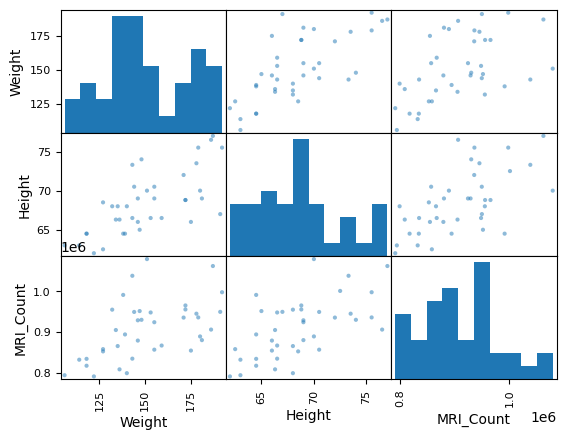

In [13]:
scatter_matrix(data1[['Weight', 'Height', 'MRI_Count']])

Created a different scatter matrix using pandas

array([[<Axes: xlabel='PIQ', ylabel='PIQ'>,
        <Axes: xlabel='VIQ', ylabel='PIQ'>,
        <Axes: xlabel='FSIQ', ylabel='PIQ'>],
       [<Axes: xlabel='PIQ', ylabel='VIQ'>,
        <Axes: xlabel='VIQ', ylabel='VIQ'>,
        <Axes: xlabel='FSIQ', ylabel='VIQ'>],
       [<Axes: xlabel='PIQ', ylabel='FSIQ'>,
        <Axes: xlabel='VIQ', ylabel='FSIQ'>,
        <Axes: xlabel='FSIQ', ylabel='FSIQ'>]], dtype=object)

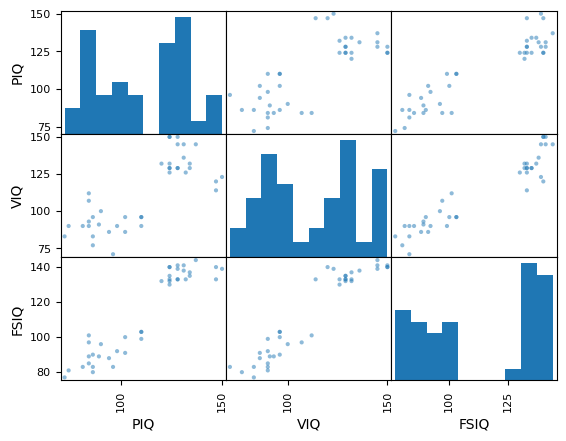

In [14]:
scatter_matrix(data1[['PIQ', 'VIQ', 'FSIQ']])

Used scipy.stats to get a t statistic and p-value of the data

In [15]:
stats.ttest_1samp(data1['VIQ'], 0)

TtestResult(statistic=np.float64(30.08809997084933), pvalue=np.float64(1.3289196468727879e-28), df=np.int64(39))

Used scipy.stats to test if the difference between female and male VIQ was significant

In [16]:
female_viq = data1[data1['Gender'] == 'Female']['VIQ']
male_viq = data1[data1['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq)

TtestResult(statistic=np.float64(-0.7726161723275012), pvalue=np.float64(0.44452876778583217), df=np.float64(38.0))

Found if there was a significant difference between PIQ and FSIQ

In [17]:
stats.ttest_ind(data1['FSIQ'], data1['PIQ'])

TtestResult(statistic=np.float64(0.465637596380964), pvalue=np.float64(0.6427725009414841), df=np.float64(78.0))

Removed confounding variables using a paired test

In [18]:
stats.ttest_rel(data1['FSIQ'], data1['PIQ'])

TtestResult(statistic=np.float64(1.7842019405859857), pvalue=np.float64(0.08217263818364236), df=np.int64(39))

Got the results of a 1 sample t-test

In [19]:
stats.ttest_1samp(data1['FSIQ'] - data1['PIQ'], 0)

TtestResult(statistic=np.float64(1.7842019405859857), pvalue=np.float64(0.08217263818364236), df=np.int64(39))

Removed Guassian errors with a Wilcoxon signed rank test

In [20]:
stats.wilcoxon(data1['FSIQ'], data1['PIQ'])

WilcoxonResult(statistic=np.float64(274.5), pvalue=np.float64(0.10659492713506856))

Set variables for x and y then set the dataframe of x and y to the variable "data2"

In [21]:
x = np.linspace(-5, 5, 20)
np.random.seed(1)
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)
data2 = pd.DataFrame({'x': x, 'y': y})

Modeled and Fit the data and set it equal to "model"

In [22]:
model1 = ols("y ~ x", data2).fit()

Printed the summary stats

In [23]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Fri, 12 Jul 2024   Prob (F-statistic):           8.56e-08
Time:                        21:47:59   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

Compared VIQ between males and females then printed the summary statistics

In [24]:
model2 = ols("VIQ ~ Gender + 1", data1).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Fri, 12 Jul 2024   Prob (F-statistic):              0.445
Time:                        21:48:00   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.

Created a table that lists each IQ and its type

In [25]:
data_fisq = pd.DataFrame({'iq': data1['FSIQ'], 'type': 'fsiq'})
data_piq = pd.DataFrame({'iq': data1['PIQ'], 'type': 'piq'})
data_long = pd.concat((data_fisq, data_piq))
print(data_long) 

     iq  type
0   133  fsiq
1   140  fsiq
2   139  fsiq
3   133  fsiq
4   137  fsiq
..  ...   ...
35  128   piq
36  124   piq
37   94   piq
38   74   piq
39   89   piq

[80 rows x 2 columns]


Modeled and printed the summary statistics of the IQ and type of IQ

In [26]:
model3 = ols("iq ~ type", data_long).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Fri, 12 Jul 2024   Prob (F-statistic):              0.445
Time:                        21:48:01   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.

Set data3 to the iris.csv dataframe and modeled and printed the summary statistics on sepal width and petal length

In [31]:
data3 = pd.read_csv('iris.csv')
model4 = ols('sepal_width ~ name + petal_length', data3).fit()
print(model4.summary())  

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Fri, 12 Jul 2024   Prob (F-statistic):           1.58e-20
Time:                        21:48:34   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0

Performed an F test on petal length

In [32]:
print(model4.f_test([0, 1, -1, 0]))

<F test: F=3.245335346574177, p=0.07369058781701142, df_denom=146, df_num=1>


Used urllib to import a data set. Then formated the data and set it equal to "data3"

In [48]:
if not os.path.exists('wages.txt'): urllib.request.urlretrieve('http://lib.stat.cmu.edu/datasets/CPS_85_Wages', 'wages.txt')
names = [
    'EDUCATION: Number of years of education',
    'SOUTH: 1=Person lives in South, 0=Person lives elsewhere',
    'SEX: 1=Female, 0=Male',
    'EXPERIENCE: Number of years of work experience',
    'UNION: 1=Union member, 0=Not union member',
    'WAGE: Wage (dollars per hour)',
    'AGE: years',
    'RACE: 1=Other, 2=Hispanic, 3=White',
    'OCCUPATION: 1=Management, 2=Sales, 3=Clerical, 4=Service, 5=Professional, 6=Other',
    'SECTOR: 0=Other, 1=Manufacturing, 2=Construction',
    'MARR: 0=Unmarried,  1=Married',
]

short_names = [n.split(':')[0] for n in names]

data3 = pandas.read_csv('wages.txt', skiprows=27, skipfooter=6, sep=None, header=None, engine='python')
data3.columns = short_names

data3['WAGE'] = np.log10(data3['WAGE'])

Printed the data

In [49]:
print(data3)

     EDUCATION  SOUTH  SEX  EXPERIENCE  UNION      WAGE  AGE  RACE  \
0            8      0    1          21      0  0.707570   35     2   
1            9      0    1          42      0  0.694605   57     3   
2           12      0    0           1      0  0.824126   19     3   
3           12      0    0           4      0  0.602060   22     3   
4           12      0    0          17      0  0.875061   35     3   
..         ...    ...  ...         ...    ...       ...  ...   ...   
529         18      0    0           5      0  1.055378   29     3   
530         12      0    1          33      0  0.785330   51     1   
531         17      0    1          25      1  1.366423   48     1   
532         12      1    0          13      1  1.298416   31     3   
533         16      0    0          33      0  1.186956   55     3   

     OCCUPATION  SECTOR  MARR  
0             6       1     1  
1             6       1     1  
2             6       1     0  
3             6       0     0  

Removed all infinite values and created a scatter matrix of the data

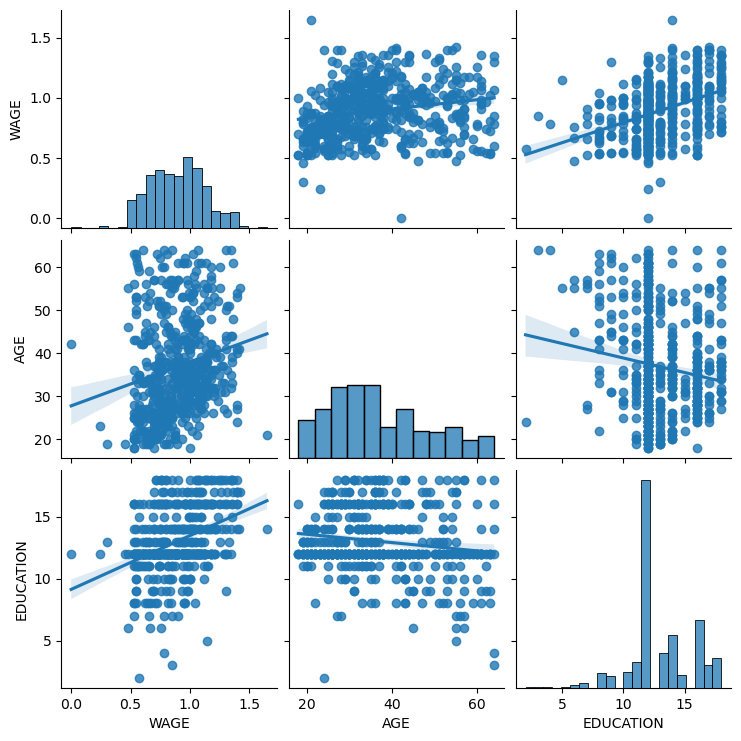

In [60]:
data3.replace([np.inf, -np.inf], np.nan, inplace=True)

data4 = data3.dropna()

seaborn.pairplot(data4, vars=['WAGE', 'AGE', 'EDUCATION'], kind='reg')

Plotted the data but differentiated base on sex

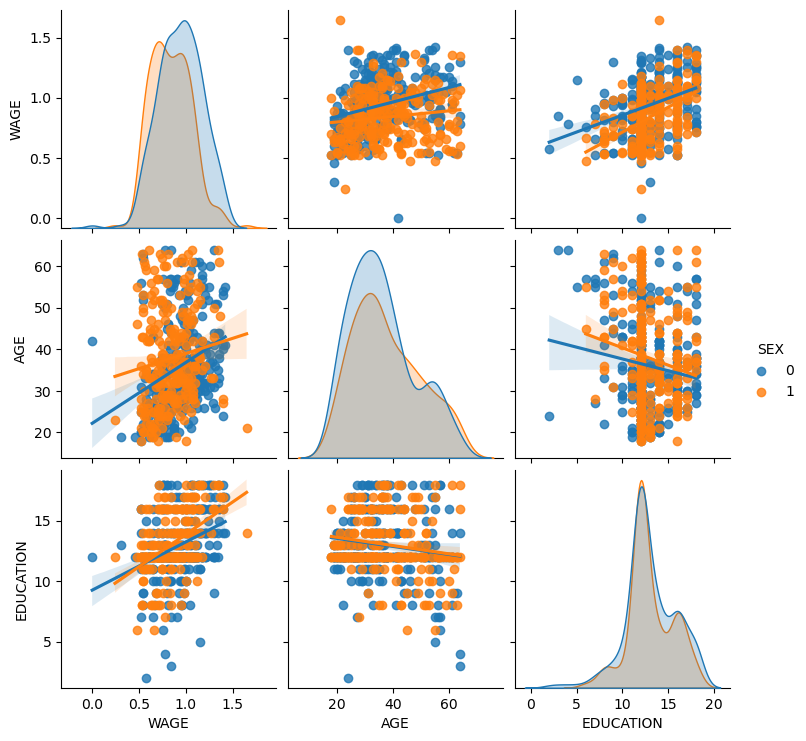

In [63]:
seaborn.pairplot(data4, vars=['WAGE', 'AGE', 'EDUCATION'], kind='reg', hue='SEX')

Created a linear regression of wages versus education

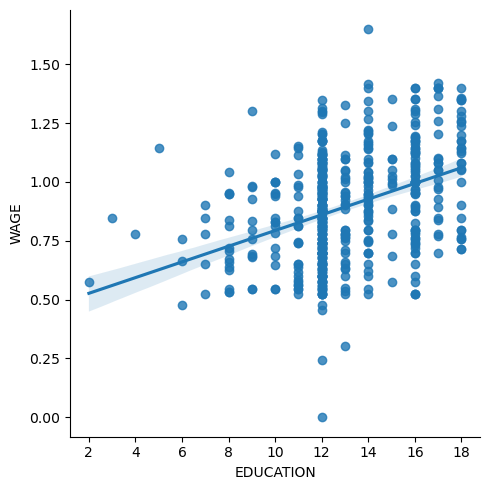

In [65]:
seaborn.lmplot(y='WAGE', x='EDUCATION', data=data4)  

In [77]:
formula = 'WAGE ~ EDUCATION + SEX + EDUCATION * SEX'
result = sm.OLS.from_formula(formula, data=data4).fit()    
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     43.72
Date:                Fri, 12 Jul 2024   Prob (F-statistic):           2.94e-25
Time:                        22:22:50   Log-Likelihood:                 88.503
No. Observations:                 534   AIC:                            -169.0
Df Residuals:                     530   BIC:                            -151.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.5748      0.058      9.861